In [7]:
load preproc_data.mat;так 
load elec_cor_new_TMS.mat;

In [129]:
who


Your variables are:

A             c             chan_n        data_in_bgr   freq_All      neighbours    sign_chans    subjects      
NEG           case_         data          design        freq_n        nsubj         stat          temp          
POS           case_num      data_all      design1       groups        num_of_cases  stat_mod      temp_bgr      
a             cases         data_all_bgr  design2       i             pos_signcl    stat_temp     time          
ans           cfg           data_bgr      elec_cor      mask          res           statsum       time_n        
b             chan          data_in       freq          neg_signcl    res_bgr       subj          




In [130]:
tic;
data_in = res{1}.right_im1;
cfg                         = [];
cfg.feedback = 'no';
cfg.demean    = 'yes';                              % do baseline correction with the complete trial
data_in = ft_preprocessing(cfg, data_in);

cfg = [];
cfg.feedback = 'no';
cfg.toilim = [0 9.5];
data_in = ft_redefinetrial(cfg, data_in);

cfg=[];
cfg.channel = 'all';
cfg.method     = 'wavelet';
cfg.output     = 'pow';
cfg.foi        = [2:0.4:40];
cfg.pad = 'nextpow2';
cfg.width = cfg.foi;
cfg.keeptrials = 'no';
cfg.feedback = 'no';
cfg.toi        = [0:0.004:9.5];
data_in = ft_freqanalysis(cfg, data_in);
toc

the call to "ft_selectdata" took 0 seconds
the call to "ft_preprocessing" took 1 seconds
removing 0 trials in which no data was selected
the call to "ft_redefinetrial" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_freqanalysis" took 56 seconds
Elapsed time is 56.812393 seconds.



In [ ]:
w

the call to "ft_selectdata" took 0 seconds
 In 'C:\Program Files\MATLAB\fieldtrip-20210106\ft_singleplotTFR.m' at line 338

 In 'C:\Program Files\MATLAB\fieldtrip-20210106\ft_singleplotTFR.m' at line 343

the call to "ft_singleplotTFR" took 2 seconds



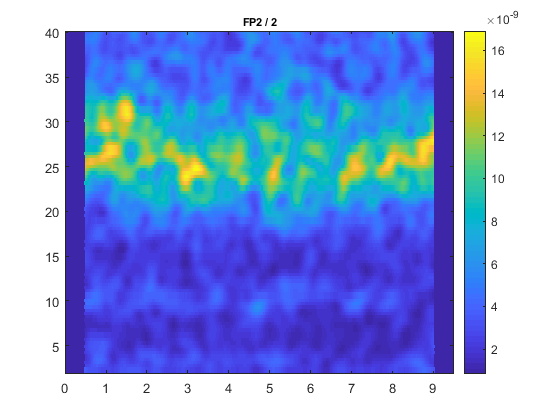

In [132]:
cfg = [];
cfg.channel = ['FP2'];
ft_singleplotTFR(cfg, data_in)

In [52]:
cases = fieldnames(res{1});
num_of_cases = length(cases);

data_bgr = struct();

subjects = [1:15];
subjects = subjects(subjects ~= 10);
for case_num=3:num_of_cases
    case_ = cases{case_num};
    freq_All = {};
    for subj=subjects
        data_in_bgr = res_bgr{1, subj}.right_im1;
        for i=1:32
            data_in_bgr.hdr.chanunit{i,1}='V';
        end;
%         data_in.label{1} = 'Fp1';
%         data_in.label{2} = 'Fp2';
        data_in_bgr.hdr.chanunit(33,:)=[];
        data_in_bgr.hdr.label(33,:) = [];
        data_in_bgr.hdr.nChans=32;
        data_in_bgr.hdr.elec.elecpos=elec_cor.elecpos;
        data_in_bgr.hdr.elec.chanpos=elec_cor.chanpos;
        data_in_bgr.hdr.elec.chanunit=data_in.hdr.chanunit;
        data_in_bgr.hdr.nTrials=size(data_in.trial,2);
        data_in_bgr.hdr.chantype=data_in.hdr.elec.chantype;
        data_in_bgr.elec.elecpos=elec_cor.elecpos;
        data_in_bgr.elec.chanpos=elec_cor.chanpos;

        cfg                         = [];
        cfg.feedback = 'no';
        cfg.demean    = 'yes';                              % do baseline correction with the complete trial
        data_all_bgr = ft_preprocessing(cfg, data_in_bgr);

        cfg = [];
        cfg.feedback = 'no';
        cfg.toilim = [0 29];
        data_all_bgr = ft_redefinetrial(cfg, data_all_bgr);

        cfg=[];
        cfg.channel = 'all';
        cfg.method     = 'wavelet';
        cfg.output     = 'pow';
        cfg.foi        = [2:0.4:40];
        cfg.pad = 'nextpow2';
        cfg.width = cfg.foi;
        cfg.keeptrials = 'no';
        cfg.feedback = 'no';
        cfg.toi        = [0:0.004:29];
        temp_bgr = ft_freqanalysis(cfg, data_all_bgr);
        cfg = [];
        cfg.latency = [1 28];
        cfg.avgovertime = 'yes';
        freq_All{subj} = ft_selectdata(cfg, temp_bgr);
    end
    data_bgr.(string(case_)) = freq_All(~cellfun(@isempty,freq_All));
end

the call to "ft_selectdata" took 0 seconds
the call to "ft_preprocessing" took 0 seconds
removing 0 trials in which no data was selected
the call to "ft_redefinetrial" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_freqanalysis" took 6 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_preprocessing" took 0 seconds
removing 0 trials in which no data was selected
the call to "ft_redefinetrial" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_freqanalysis" took 6 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_preprocessing" took 0 seconds
removing 0 trials in which no data was selected
the call to "ft_redefinetrial" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_freqanalysis" took 6 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft

In [89]:
res_bgr = res_bgr(~cellfun(@isempty,res_bgr));

In [88]:
res_bgr = is


Your variables are:

A             c             chan_n        data_in_bgr   freq_All      neighbours    sign_chans    subjects      
NEG           case_         data          design        freq_n        nsubj         stat          temp          
POS           case_num      data_all      design1       groups        num_of_cases  stat_mod      temp_bgr      
a             cases         data_all_bgr  design2       i             pos_signcl    stat_temp     time          
ans           cfg           data_bgr      elec_cor      mask          res           statsum       time_n        
b             chan          data_in       freq          neg_signcl    res_bgr       subj          




In [90]:
cases = fieldnames(res{1});
num_of_cases = length(cases);

data = struct();

subjects = [1:14];
for case_num=3:num_of_cases
    case_ = cases{case_num};
    freq_All = {};
    for subj=subjects
        data_in=res{1, subj}.(string(case_));
        data_in_bgr = res_bgr{1, subj}.right_im1;
        for i=1:32
            data_in.hdr.chanunit{i,1}='V';
        end;
%         data_in.label{1} = 'Fp1';
%         data_in.label{2} = 'Fp2';
        data_in.hdr.chanunit(33,:)=[];
        data_in.hdr.label(33,:) = [];
        data_in.hdr.nChans=32;
        data_in.hdr.elec.elecpos=elec_cor.elecpos;
        data_in.hdr.elec.chanpos=elec_cor.chanpos;
        data_in.hdr.elec.chanunit=data_in.hdr.chanunit;
        data_in.hdr.nTrials=size(data_in.trial,2);
        data_in.hdr.chantype=data_in.hdr.elec.chantype;
        data_in.elec.elecpos=elec_cor.elecpos;
        data_in.elec.chanpos=elec_cor.chanpos;

        cfg                         = [];
        cfg.feedback = 'no';
        cfg.demean    = 'yes';                              % do baseline correction with the complete trial
        data_all = ft_preprocessing(cfg, data_in);
        data_all_bgr = ft_preprocessing(cfg, data_in_bgr);

        cfg = [];
        cfg.feedback = 'no';
        cfg.toilim = [0 9.5];
        data_all = ft_redefinetrial(cfg, data_all);
        cfg.toilim = [0 29];
        data_all_bgr = ft_redefinetrial(cfg, data_all_bgr);

        cfg=[];
        cfg.channel = 'all';
        cfg.method     = 'wavelet';
        cfg.output     = 'pow';
        cfg.foi        = [2:0.4:40];
        cfg.toi        = [0:0.004:9.5];
        cfg.pad = 'nextpow2';
        cfg.width = cfg.foi;
        cfg.keeptrials = 'no';
        cfg.feedback = 'no';
        temp = ft_freqanalysis(cfg, data_all);
        cfg.toi        = [0:0.004:29];
        temp_bgr = ft_freqanalysis(cfg, data_all_bgr);
        cfg = [];
        cfg.latency = [1 28];
        cfg.avgovertime = 'yes';
        temp_bgr = ft_selectdata(cfg, temp_bgr);
        temp_bgr = temp_bgr.powspctrm;
        
        cfg = [];
        cfg.avgovertime = 'yes';
        cfg.latency = [1 5];
        temp = ft_selectdata(cfg, temp);
%         temp.powspctrm = (temp.powspctrm - data_bgr.(string(case_)){subj}.powspctrm)./data_bgr.(string(case_)){subj}.powspctrm;
%         [a, b, c] = size(temp.powspctrm);
%         temp_bgr = repmat(temp_bgr, [1, 1, c]);
        temp.powspctrm = (temp.powspctrm - temp_bgr)./temp_bgr;
        freq_All{subj} = temp;
    end
    data.(string(case_)) = freq_All;
end

the call to "ft_selectdata" took 0 seconds
the call to "ft_preprocessing" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_preprocessing" took 0 seconds
removing 0 trials in which no data was selected
the call to "ft_redefinetrial" took 0 seconds
removing 0 trials in which no data was selected
the call to "ft_redefinetrial" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_freqanalysis" took 52 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_freqanalysis" took 6 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_preprocessing" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_preprocessing" took 0 seconds
removing 0 trials in which no data was selected
the call to "ft_redefinetrial" took 0 seconds
removing 0 trials in which no data was selected
the call to "ft_redefinetrial" took 0 seconds
the c


ans =

    32    96




In [119]:
cfg = [];
cfg.method = 'triangulation';
cfg.elec = elec_cor;
neighbours = ft_prepare_neighbours(cfg);
tic;
cfg = [];
cfg.channel          = 'all';
%cfg.latency          = [5 8];
cfg.method           = 'montecarlo';
%cfg.frequency        = 12;
cfg.parameter        = 'powspctrm';
cfg.statistic        = 'ft_statfun_depsamplesT';
cfg.correctm         = 'cluster';
cfg.clusteralpha     = 0.05;
cfg.clusterstatistic = 'maxsum';
cfg.clusterthreshold = 'nonparametric_common';
cfg.minnbchan        = 1;
cfg.tail             = 0;
cfg.clustertail      = 0;
cfg.alpha            = 0.025;
cfg.numrandomization = 1000;
cfg.neighbours = neighbours;

nsubj = 14;
groups = 2;
design  = zeros(2,groups*nsubj);
design1 = [];
design2 = [];
for i=1:groups
    design1 = cat(2, design1, ones(1,nsubj)*i);
    design2 = cat(2, design2, [1:nsubj]);
end
design = cat(1, design1, design2);

cfg.design   = design;
cfg.ivar     = 1;
cfg.uvar     = 2;
cfg.feedback = 'yes';
[stat] = ft_freqstatistics(cfg, data.right_im1{:}, data.right_im2{:});
toc
% right
% real vs quasi
% real vs im
% im vs quasi
% save_string = "stat_tr/stat_RH_Real_CA=0.05_subj=1_lat=4s_post_vs_base_mnbc=1.mat";
% save(save_string, 'stat');

using electrodes specified in the configuration
there are on average 6.6 neighbours per channel
the call to "ft_prepare_neighbours" took 1 seconds
the call to "ft_selectdata" took 2 seconds
using specified neighbours for the channels
there are on average 6.6 neighbours per channel
the call to "ft_prepare_neighbours" took 0 seconds
using "ft_statistics_montecarlo" for the statistical testing
using "ft_statfun_depsamplesT" for the single-sample statistics
constructing randomized design
total number of measurements     = 28
total number of variables        = 2
number of independent variables  = 1
number of unit variables         = 1
number of within-cell variables  = 0
number of control variables      = 0
using a permutation resampling approach
repeated measurement in variable 2 over 14 levels
number of repeated measurements in each level is 2 2 2 2 2 2 2 2 2 2 2 2 2 2 
the maximum number of unique permutations is 16384
generated 1000 random permutations
using a nonparmetric threshold for

In [125]:
stat_temp = stat;
NEG = reshape(struct2array(stat_temp.negclusters), [], numel(stat_temp.negclusters));
% POS = reshape(struct2array(stat_temp.posclusters), [], numel(stat_temp.posclusters));
[chan_n freq_n time_n] = size(stat_temp.stat);

neg_signcl = nnz(NEG(1, :) <= 0.05)
% pos_signcl = nnz(POS(1, :) <= 0.05)
sign_chans = zeros(freq_n, time_n);
% for time = 1:1:time_n
    for freq = 1:1:freq_n
        for chan = 1:1:32
            if stat_temp.negclusterslabelmat(chan,freq) < 1 || stat_temp.negclusterslabelmat(chan,freq) > 1
                stat_temp.stat(chan,freq) = 0;
                sign_chans(freq) = sign_chans(freq) + 1;
            end
        end
    end
% end
sign_chans = (sign_chans == 0) + sign_chans;
stat_temp.stat = stat_temp.stat*(-1);
stat_temp.stat = sum(stat_temp.stat, 1);
stat_temp.stat = squeeze(stat_temp.stat);
stat_temp.dimord = 'freq';
% stat_temp.stat = stat_temp.stat ./ sign_chans;
% stat_temp.stat = stat_temp.stat .* (stat_temp.stat > 9);
% cfg = [];
% % cfg.channel = 'all';
% % cfg.layout ='EEG1010_mod.lay';
% cfg.colorbar = 'yes';
% % cfg.alpha = 0.05;
% cfg.parameter     = 'stat';
% % ft_singleplotTFR(cfg, stat_temp);
% freq = [2:0.4:40];
% A = 1:1:freq_n;
% % A = find((freq >= 8) .* (freq <= 14));
% % A = find((freq >= 14) .* (freq <= 22));
% % A = find((freq >= 22) .* (freq <= 30));
% figure
%     surf([1:0.004:5],freq(A),stat_temp.stat(A(1):A(end), 1:end),'EdgeColor','none');
%     colormap default
%     view(2);
%     colorbar();


neg_signcl =

     0




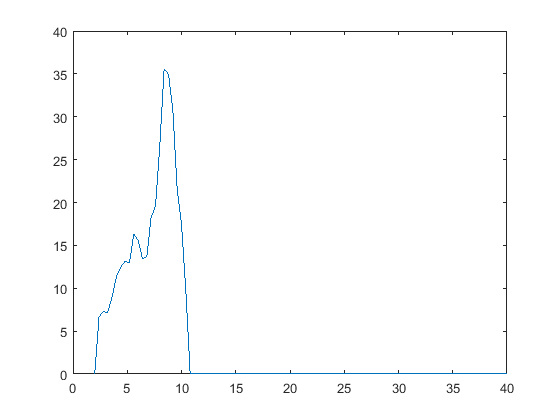

In [126]:
plot([2:0.4:40], stat_temp.stat)

In [120]:
stat.negclusters.prob


ans =

    0.0569


ans =

    0.0949


ans =

    0.1369


ans =

    0.1379


ans =

    0.3347


ans =

    0.3746


ans =

    0.4855


ans =

    0.4855


ans =

    0.4995


ans =

    0.5135


ans =

    0.5345


ans =

    0.5824


ans =

    0.5884





neg_signcl =

     1


pos_signcl =

     0




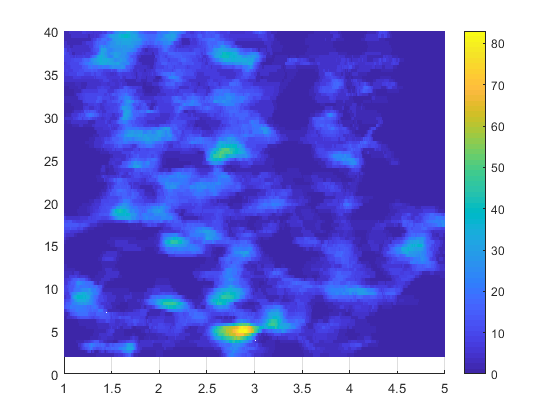

In [47]:
stat_temp = stat;
NEG = reshape(struct2array(stat_temp.negclusters), [], numel(stat_temp.negclusters));
POS = reshape(struct2array(stat_temp.posclusters), [], numel(stat_temp.posclusters));
[chan_n freq_n time_n] = size(stat_temp.stat);

neg_signcl = nnz(NEG(1, :) <= 0.05)
pos_signcl = nnz(POS(1, :) <= 0.05)
sign_chans = zeros(freq_n, time_n);
for time = 1:1:time_n
    for freq = 1:1:freq_n
        for chan = 1:1:32
            if stat_temp.negclusterslabelmat(chan,freq,time) < neg_signcl || stat_temp.negclusterslabelmat(chan,freq,time) > neg_signcl
                stat_temp.stat(chan,freq,time) = 0;
                sign_chans(freq, time) = sign_chans(freq, time) + 1;
            end
        end
    end
end
sign_chans = (sign_chans == 0) + sign_chans;
stat_temp.stat = stat_temp.stat*(-1);
stat_temp.stat = sum(stat_temp.stat, 1);
stat_temp.stat = squeeze(stat_temp.stat);
stat_temp.dimord = 'freq_time';
% stat_temp.stat = stat_temp.stat ./ sign_chans;
% stat_temp.stat = stat_temp.stat .* (stat_temp.stat > 9);
cfg = [];
% cfg.channel = 'all';
% cfg.layout ='EEG1010_mod.lay';
cfg.colorbar = 'yes';
% cfg.alpha = 0.05;
cfg.parameter     = 'stat';
% ft_singleplotTFR(cfg, stat_temp);
freq = [2:0.4:40];
A = 1:1:freq_n;
% A = find((freq >= 8) .* (freq <= 14));
% A = find((freq >= 14) .* (freq <= 22));
% A = find((freq >= 22) .* (freq <= 30));
figure
    surf([1:0.004:5],freq(A),stat_temp.stat(A(1):A(end), 1:end),'EdgeColor','none');
    colormap default
    view(2);
    colorbar();

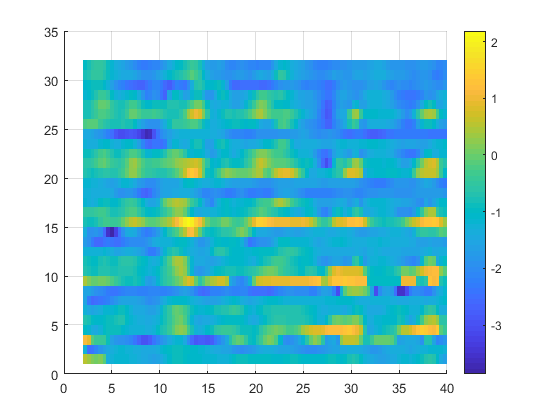

In [93]:
figure
    surf(stat.freq, [1:32],stat.stat,'EdgeColor','none');
    colormap default
    view(2);
    colorbar();

In [31]:
save('tms_im1_vs_im2_base_rest_1-1_corrected.mat', "stat");

In [68]:
for i=1:14
    data_bgr.right_im1{i}.dimord = 'chan_freq';
    data_bgr.right_im2{i}.dimord = 'chan_freq';
end

for i=1:14
    data_bgr.right_im1{i} = rmfield(data_bgr.right_im1{i}, 'time');
    data_bgr.right_im2{i} = rmfield(data_bgr.right_im2{i}, 'time');
end

In [59]:
for i=1:14
    data.right_im1{i}.dimord = 'chan_freq';
    data.right_im2{i}.dimord = 'chan_freq';
end

for i=1:14
    data.right_im1{i} = rmfield(data.right_im1{i}, 'time');
    data.right_im2{i} = rmfield(data.right_im2{i}, 'time');
end


ans =

  Columns 1 through 13

    2.0142    2.4109    2.8076    3.2043    3.6011    3.9978    4.3945    4.7913    5.1880    5.6152    6.0120    6.4087    6.8054

  Columns 14 through 26

    7.2021    7.5989    7.9956    8.3923    8.7891    9.1858    9.6130   10.0098   10.4065   10.8032   11.2000   11.5967   11.9934

  Columns 27 through 39

   12.3901   12.7869   13.2141   13.6108   14.0076   14.4043   14.8010   15.1978   15.5945   15.9912   16.3879   16.8152   17.2119

  Columns 40 through 52

   17.6086   18.0054   18.4021   18.7988   19.1956   19.5923   19.9890   20.3857   20.8130   21.2097   21.6064   22.0032   22.3999

  Columns 53 through 65

   22.7966   23.1934   23.5901   23.9868   24.4141   24.8108   25.2075   25.6042   26.0010   26.3977   26.7944   27.1912   27.5879

  Columns 66 through 78

   28.0151   28.4119   28.8086   29.2053   29.6021   29.9988   30.3955   30.7922   31.1890   31.5857   32.0129   32.4097   32.8064

  Columns 79 through 91

   33.2031   33.5999   33.

reading layout from file ../EEG1010_mod.lay
the call to "ft_prepare_layout" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotTFR" took 1 seconds



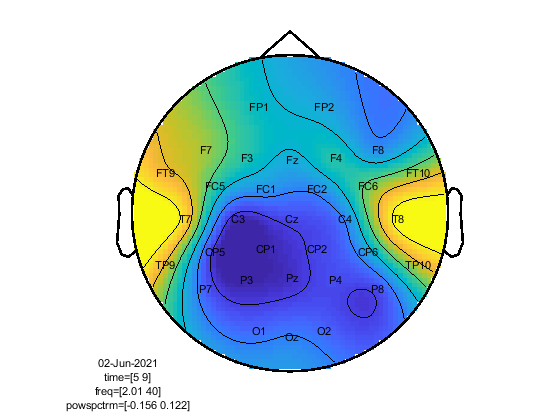

In [69]:
cfg = [];
cfg.layout = '../EEG1010_mod.lay';
cfg.parameter = 'powspctrm';
cfg.marker = 'labels';
ft_topoplotTFR(cfg, data.right_im1{1})

the call to "ft_selectdata" took 0 seconds
the call to "ft_selectdata" took 0 seconds

cfg = 

  struct with fields:

           highlight: 'on'
    highlightchannel: 24
          commentpos: 'title'
              layout: 'EEG1010_mod.lay'
         interactive: 'no'
            colorbar: 'yes'
           parameter: 'stat'

reading layout from file EEG1010_mod.lay
the call to "ft_prepare_layout" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotER" took 1 seconds



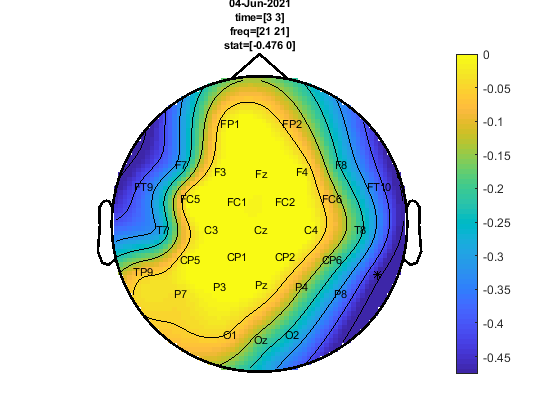

In [121]:
cfg = [];
% cfg.latency = [2 3.3];
stat_temp = stat;
mask = stat_temp.negclusterslabelmat == 1;
stat_temp.stat = stat_temp.stat .* mask;
% cfg.frequency = [3 10];
cfg.avgoverfreq = 'yes';
% cfg.avgovertime = 'yes';
% cfg.nanmean = 'no';
cfg.parameter    = 'stat';
stat_mod = ft_selectdata(cfg, stat_temp);
statsum = stat_mod.stat;
cfg.avgoverfreq = 'yes';
stat_mod = ft_selectdata(cfg, stat_mod);
% stat_mod.stat = statsum;

% stat_mod.stat=statsum;

cfg = [];
mask = zeros(numel(stat_mod.label),1);
mask = (abs(stat_mod.stat)>0.9*max(abs(statsum))); 
cfg.highlight = 'on';
cfg.highlightchannel = find(mask);
cfg.commentpos = 'title';
cfg.layout = 'EEG1010_mod.lay';
cfg.interactive = 'no';
cfg.colorbar = 'yes';
cfg.parameter     = 'stat'
cfg.marker = 'labels';
figure;
ft_topoplotER(cfg, stat_mod);

In [ ]:
data.right_im2{1}.label

In [10]:
mne.channels.make_standard_montage()

Undefined variable "mne" or class "mne.channels.make_standard_montage".




cfg = 

  struct with fields:

     commentpos: 'title'
         layout: 'EEG1010_mod.lay'
    interactive: 'no'
       colorbar: 'yes'
      parameter: 'stat'

reading layout from file EEG1010_mod.lay
the call to "ft_prepare_layout" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotER" took 1 seconds



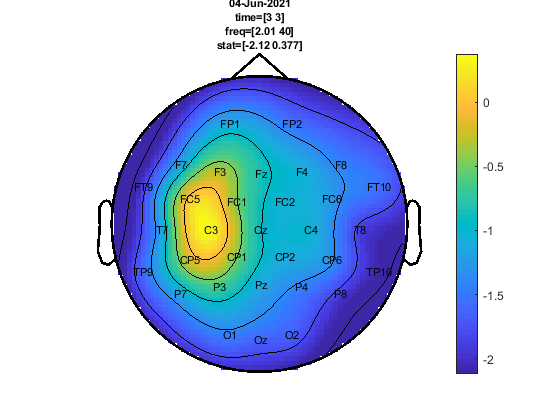

In [95]:
cfg = [];
% cfg.highlight = 'on';
% cfg.highlightchannel = find(mask);
cfg.commentpos = 'title';
cfg.layout = 'EEG1010_mod.lay';
cfg.interactive = 'no';
cfg.colorbar = 'yes';
cfg.parameter     = 'stat'
cfg.marker = 'labels';
figure;
ft_topoplotER(cfg, stat);